In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy



In [ ]:
path = untar_data(URLs.CAMVID)

In [3]:

path = "C:\\Users\\91958\\camvid_fastai\\"
path_img = path + 'images'
path_lbl = path + 'labels'

In [4]:
fnames = get_image_files(path_img)
fnames[:3]

[WindowsPath('C:/Users/91958/camvid_fastai/images/0001TP_006690.png'),
 WindowsPath('C:/Users/91958/camvid_fastai/images/0001TP_006720.png'),
 WindowsPath('C:/Users/91958/camvid_fastai/images/0001TP_006750.png')]

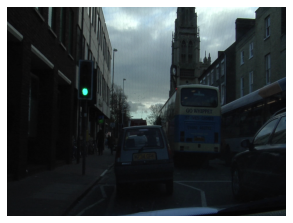

In [5]:
img = open_image(fnames[0]);
img.show(figsize=(5,5))

In [6]:
get_y_fn = lambda x: path_lbl + '\\' +f'{x.stem}_P{x.suffix}'

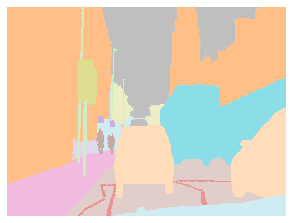

In [7]:
img_f = fnames[0]
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5))

In [8]:
mask_array= np.array(mask)
mask_array

array(ImageSegment (1, 720, 960), dtype=object)

In [9]:
mask.data

tensor([[[ 4,  4,  4,  ...,  4,  4,  4],
         [ 4,  4,  4,  ...,  4,  4,  4],
         [ 4,  4,  4,  ...,  4,  4,  4],
         ...,
         [19, 19, 19,  ..., 30, 30, 30],
         [19, 19, 19,  ..., 30, 30, 30],
         [19, 19, 19,  ..., 30, 30, 30]]])

In [10]:
codes = np.loadtxt(path + 'codes.txt', dtype=str); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [11]:
len(codes)

32

In [12]:
src = (SegmentationItemList.from_folder(path_img)
       .split_by_fname_file('../valid.txt')
       .label_from_func(get_y_fn, classes=codes))

In [13]:
data = (src.transform(get_transforms(), size=224, tfm_y=True)
        .databunch(bs=3)
        .normalize(imagenet_stats))

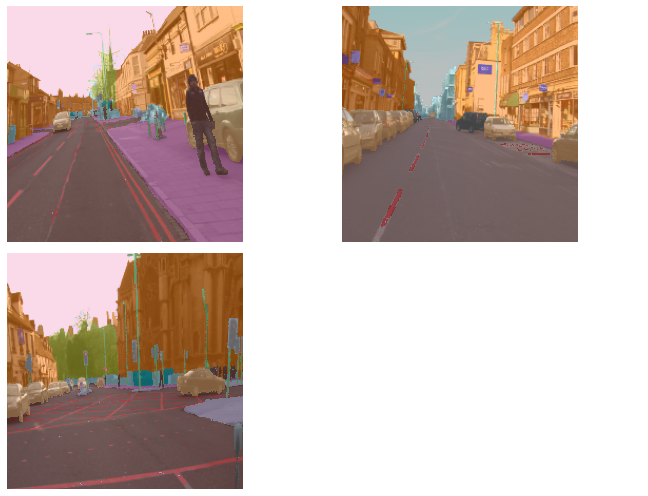

In [14]:
data.show_batch(2, figsize=(10,7))

In [15]:
data.c

32

In [16]:
len(data.train_ds)

600

In [17]:
len(data.valid_ds)

101

In [18]:
learn = unet_learner(data, models.resnet34, metrics=accuracy).to_fp16()

##to_fp16() half precision training use 16 bits instead of 32 bits.

In [19]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 4.00 GiB total capacity; 590.71 MiB already allocated; 4.55 MiB free; 614.00 MiB reserved in total by PyTorch)

In [ ]:
learn.fit_one_cycle(5, slice())


learn.show_results(rows=3, figsize=(8,9))